In [1]:
import matplotlib.pyplot as plt
import numpy as np, os
from matplotlib import rc, font_manager
from mpl_toolkits.basemap import Basemap

from astropy.coordinates import SkyCoord
from astropy import units as u

rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

try:
    fm = font_manager.json_load(os.path.expanduser("~/.matplotlib/fontlist-v310.json"))
    fm.findfont("serif",fontext="afm", rebuild_if_missing=False)
except FileNotFoundError:
    pass

from astropy.time import Time
import datetime

findfont: Font family ['serif'] not found. Falling back to Helvetica.


In [134]:
def get_file(path):
    #opens and external file and makes it into a list
    fopen = path
    f=open(fopen, 'r+')
    g=list(f)
    g=map(lambda s: s.strip(), g)
    return g

def splitt(old_list):
    #splits the list entries into sublists
    new_list=[]
    for i in old_list:
        new_list+=[i.split()]
    return new_list

def splitt2(old_list,char):
    #splits the list entries into sublists
    new_list=[]
    for i in old_list:
        new_list+=[i.split(char)]
    return np.array(new_list)

def refine_fits(old_list, length_cat, symbol_cat, 
    column_search_number, column_retrival_number):
    #to refine an imported list after the use of get_file()
    #to remove header information or filter the list
    # only works for 2-dim type objects
    #symbol_cat is a single character
    tmp_list=[]
    if not length_cat==None:
        for i in old_list:
            if len(i)==length_cat:
                tmp_list+=[i]
    else:
        tmp_list=old_list
    tmp_list_2=[]
    if not symbol_cat==None:
        for i in tmp_list:
            if not column_search_number==None:
                column=i[column_search_number-1] #searches specific column for match
            else:
                column=i #searches all columns.
            for row_element in column: #searching rows in columns
                if row_element.count(symbol_cat)>0:
                    tmp_list_2+=[column]
                    break #ends if it finds it to prevent line repeats
                else:
                    continue #continues to look if it doesn't
    else:
        tmp_list_2=tmp_list
    tmp_list_3=[]
    if column_search_number==None:
        if not column_retrival_number==None:
            for i in tmp_list_2:
                tmp_list_3+=[i[column_retrival_number-1]]
        else:
            tmp_list_3=tmp_list_2
    else:
        tmp_list_3=tmp_list_2
    tmp_list_4 = []
    for k in range(len(tmp_list_3)):
        if 'localhos' not in tmp_list_3[k]:
            tmp_list_4+=[tmp_list_3[k]]
    return tmp_list_4

def replaceDE(vector):
    vector_2 = []
    for i in range(len(vector)):
        vector_2+=[vector[i].replace('D','E')]
    return vector_2

def read_multiband_delays2(file):
    SN     = list(get_file(file))
    indx   = int(SN.index('***BEGIN*PASS***')+1)
    header = SN[:indx] #keep header intact for later
    data   = splitt(SN[indx:-1])
    ender  = SN[-1]
    return header,data,ender

def clean_INDE_and_D(list_list):
    for i in range(len(list_list)):
        for j in range(len(list_list[i])):
            if list_list[i][j]=="'INDE'":
                list_list[i][j]=9999.9
            else:
                list_list[i][j]=float(list_list[i][j].replace('D','E'))
    return list_list

def replaceINDEv(vector):
    vector_2 = []
    for i in range(len(vector)):
        if 'INDE' in vector[i]:
            vector_2+=[np.nan]
        else:
            vector_2+=[vector[i]]
    return np.array(vector_2)

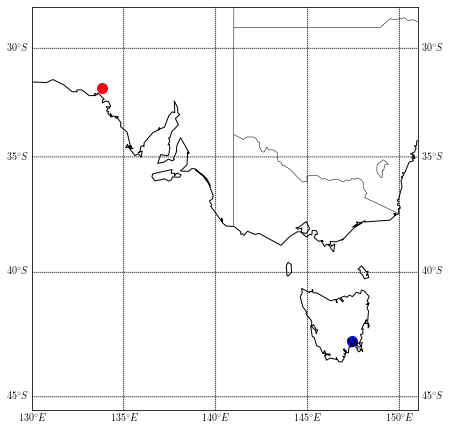

In [165]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=130.,llcrnrlat=-45.5,urcrnrlon=151.,urcrnrlat=-28.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawstates()
# m.fillcontinents()
m.drawparallels(np.arange(- 90, 90,5),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,5),labels=[1,1,0,1])
m.scatter([133.809],[-31.868],color='r',latlon=True,s=100,marker='o')
m.scatter([147.440],[-42.804],color='b',latlon=True,s=100,marker='o')
# m.scatter([132.15],[-14.375],color='r',latlon=True,s=100,marker='o')
# m.scatter([115.35],[-29.047],color='b',latlon=True,s=100,marker='o')
plt.savefig('/Users/Lucas/pulsar/hobart-ced.pdf',bbox_inches='tight')

In [1]:
num_chans = 32
specRes   = 1./num_chans
filenm = 'B0833-45.{0}.binconfig'.format(num_chans)
with open(filenm, 'w+') as w:
    print('NUM POLYCO FILES:   1',file=w)
    print('POLYCO FILE 0:      DPT04A-B0833-45.polyco',file=w)
    print('NUM PULSAR BINS: {0}'.format(num_chans),file=w)
    print('SCRUNCH OUTPUT:    FALSE',file=w)
    for i in range(num_chans):
        end = (1+i)*specRes                                
        print('BIN PHASE END {0:<.0f}:   {1:5.8f}'.format(i,end),file=w) 
        print('BIN WEIGHT {0:<.0f}:       1.0'.format(i),file=w) 

In [98]:
(-59256.54159483+59256.54183716)*24*60*60

20.937312254682183

In [105]:
Time(59256.54159483,format='mjd').to_value('isot')

'2021-02-11T12:59:53.793'

In [114]:
P = splitt(get_file('DPT04A-B0833-45.polyco.klg'))

In [201]:
t  = []
pr = []
c1,c2,c3,c4,c5,c6=[],[],[],[],[],[]
for p in range(len(P)):
    if len(P[p])==6:
        t.append(P[p-1][3])
        pr.append(P[p][0])
        c1.append(P[p+1][0])
        c2.append(P[p+1][1])
        c3.append(P[p+1][2])
        c4.append(P[p+2][0])
        c5.append(P[p+2][1])
        c6.append(P[p+2][2])
T   = np.array(t ).astype(float)
P_r = np.array(pr).astype(float)
C1  = np.array(c1).astype(float)
C2  = np.array(c2).astype(float)
C3  = np.array(c3).astype(float)
C4  = np.array(c4).astype(float)
C5  = np.array(c5).astype(float)
C6  = np.array(c6).astype(float)
#C7  = np.array(c7).astype(float)

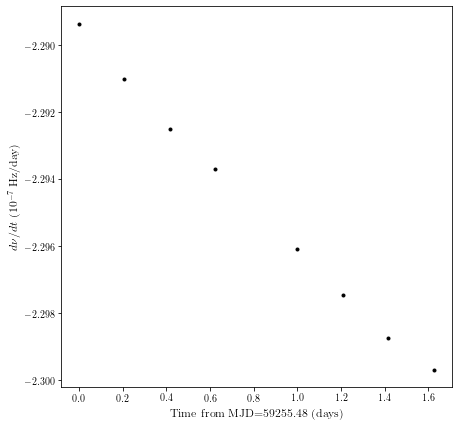

In [242]:
fig, ax = plt.subplots(1,figsize=(7,7))
ax.plot(T-T[0], C3*1e7,'k.')
#ax[1].plot(T-T[0], C3,'k-.')
ax.set_ylabel(r'$d\nu/dt$ ($10^{-7}$ Hz/day)',fontsize=12)
#ax[1].set_ylabel(r'$d^2\nu/dt^2$')
ax.set_xlabel(r'Time from MJD={0:.2f} (days)'.format(T[0]),fontsize=12)
fig.savefig('/Users/Lucas/pulsar/dnudt.pdf',bbix_inches='tight')

In [226]:
f = float(P[1][1]) + 

In [225]:
float(P[1][1])

11.195871107305

In [16]:
v = SkyCoord(ra='08:35:20.61153', dec='-45:10:34.8755',unit=(u.hourangle, u.deg),frame='icrs')

c1 = SkyCoord('08:12:40.9741 -47:51:52.974',unit=(u.hourangle, u.deg),frame='icrs')
c2 = SkyCoord('08:07:40.9787 -48:27:57.006',unit=(u.hourangle, u.deg),frame='icrs')
c3 = SkyCoord('08:09:45.9862 -49:16:39.851',unit=(u.hourangle, u.deg),frame='icrs')
c4 = SkyCoord('09:08:56.9563 -46:55:54.127',unit=(u.hourangle, u.deg),frame='icrs')
c5 = SkyCoord('08:28:04.7802 -37:31:06.281',unit=(u.hourangle, u.deg),frame='icrs')

x = []; y = []
for i in [v,c1,c2,c3,c4,c5]:
    x.append(i.ra.deg )
    y.append(i.dec.deg)
ax.legend([])

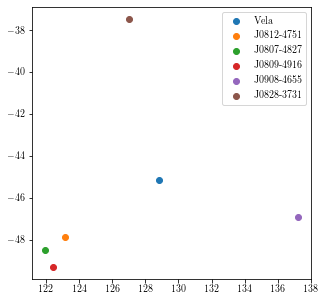

In [22]:
fig, ax = plt.subplots(1,figsize=(5,5))
for j in range(len(x)):
    ax.plot(x[j],y[j],'o')
ax.legend(['Vela','J0812-4751','J0807-4827','J0809-4916','J0908-4655','J0828-3731'])

In [147]:
dir = 'corr/'
infile = os.listdir(dir)
bmax = int(infile[-1][9])+1
fmax = int(infile[-1][16])+1
pmax = int(infile[-1][26])+1


In [ ]:
plt.close('all')
for b in range(bmax):
    for f in range(fmax):
        bfp = []; DD = []
        for p in range(4):
            key = 'baseline_{}_freq_{}_product_{}_'.format(b,f,p)
            for i in range(len(infile)):
                if infile[i][:28]==key:
                    bfp.append(infile[i])
                    data = []
                    for g in bfp:
                        data.append(np.array(splitt(get_file(dir+g))).astype(float))
                    D = np.asarray(data)
            DD.append(D)
        fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
        ax1.plot(DD[0][0,:,0],DD[0].mean(0)[:,1],'.')
        ax12 = ax1.twinx()
        ax12.plot(DD[0][0,:,0],DD[0].mean(0)[:,2]*57,'r.')
        ax12.set_ylim(-200,200)

        ax2.plot(DD[1][0,:,0],DD[1].mean(0)[:,1],'.')
        ax22 = ax2.twinx()
        ax22.plot(DD[1][0,:,0],DD[1].mean(0)[:,2]*57,'r.')
        ax22.set_ylim(-200,200)       

        ax3.plot(DD[2][0,:,0],DD[2].mean(0)[:,1],'.')
        ax32 = ax3.twinx()
        ax32.plot(DD[2][0,:,0],DD[2].mean(0)[:,2]*57,'r.')
        ax32.set_ylim(-200,200)       

        ax4.plot(DD[3][0,:,0],DD[3].mean(0)[:,1],'.')
        ax42 = ax4.twinx()
        ax42.plot(DD[3][0,:,0],DD[3].mean(0)[:,2]*57,'r.')
        ax42.set_ylim(-200,200);

In [188]:
DD = []
for p in range(4):
    key = 'baseline_{}_freq_{}_product_{}_'.format(1,3,p)
    D = []; bfp = []
    for i in range(len(infile)):
        if infile[i][:28]==key:
            bfp.append(infile[i])
            data = []
            for g in bfp:
                data.append(np.array(splitt(get_file(dir+g))).astype(float))
            D = np.asarray(data)
    DD.append(D)

In [ ]:
b = 0
f = 0
p = 0
dnu = 16/len(D[0,:,0])
nu = (D[0,:,0])*dnu
phi = D.mean(0)[:,2]
v0 = D.mean(0)[:,1]
v = v0*np.exp(np.complex(0,1)*phi)
tau = list(nu[:int(len(nu)/2)])+list(nu[int(len(nu)/2):]-16)
v2 = np.fft.fft(v)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=None)

ax1.plot(nu,D.mean(0)[:,1],'.')
ax12 = ax1.twinx()
ax12.plot(nu,D.mean(0)[:,2]*57,'r.')
ax12.set_ylim(-200,200)
ax12.set_ylabel(r'Phase (deg)');
ax1.set_xlim(0,16)
#
tau, av2 = zip(*sorted(zip(tau, abs(v2))))
ax2.plot(tau,av2,'k-')
ax2.yaxis.tick_right()
ax2.set_xlabel(r'Delay ($\mu$s)');

In [140]:
DD = []
for p in range(4):
    key = 'baseline_{}_freq_{}_product_{}_'.format(1,3,p)
    D = []; bfp = []
    for i in range(len(infile)):
        if infile[i][:28]==key:
            bfp.append(infile[i])
            data = []
            for g in bfp:
                data.append(np.array(splitt(get_file(dir+g))).astype(float))
            D = np.asarray(data)
    DD.append(D)

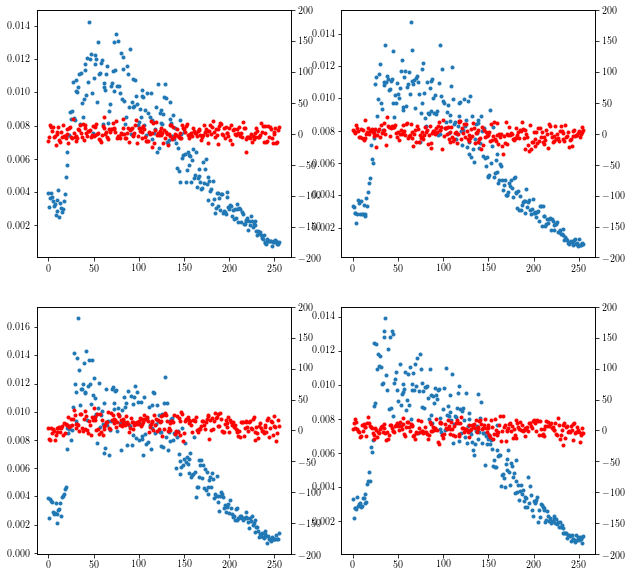

In [141]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
ax1.plot(DD[0][0,:,0],DD[0].mean(0)[:,1],'.')
ax12 = ax1.twinx()
ax12.plot(DD[0][0,:,0],DD[0].mean(0)[:,2]*57,'r.')
ax12.set_ylim(-200,200)

ax2.plot(DD[1][0,:,0],DD[1].mean(0)[:,1],'.')
ax22 = ax2.twinx()
ax22.plot(DD[1][0,:,0],DD[1].mean(0)[:,2]*57,'r.')
ax22.set_ylim(-200,200)       

ax3.plot(DD[2][0,:,0],DD[2].mean(0)[:,1],'.')
ax32 = ax3.twinx()
ax32.plot(DD[2][0,:,0],DD[2].mean(0)[:,2]*57,'r.')
ax32.set_ylim(-200,200)       

ax4.plot(DD[3][0,:,0],DD[3].mean(0)[:,1],'.')
ax42 = ax4.twinx()
ax42.plot(DD[3][0,:,0],DD[3].mean(0)[:,2]*57,'r.')
ax42.set_ylim(-200,200);

#for ax in [ax1, ax2, ax3, ax4]:
#    ax.set_ylim(0,3);

In [64]:
ct = np.array(splitt(get_file('corr/corr/baseline_0_freq_0_product_0_59289_045012_560000_source_0_bin_0.output'))).astype(float)

In [70]:
ct[:,2]

array([-2.7223    ,  1.03322   ,  3.00733   , ..., -1.09896   ,
        0.00438438,  2.82619   ])

In [ ]:
for i in range(len(infile)):
    #if 'baseline' not in infile[i]:
    #    continue
    c = np.array(splitt(get_file(dir+infile[i]))).astype(float)
    fig, ax1 = plt.subplots(1,figsize=(5,5))
    ax1.plot(c[:,0]*0.00048828125,np.log(c[:,1]),'r,')
    ax2 = ax1.twinx()
    ax2.plot(c[:,0]*0.00048828125,c[:,2]*57,'g,')
    ax2.set_ylim([-200,200])

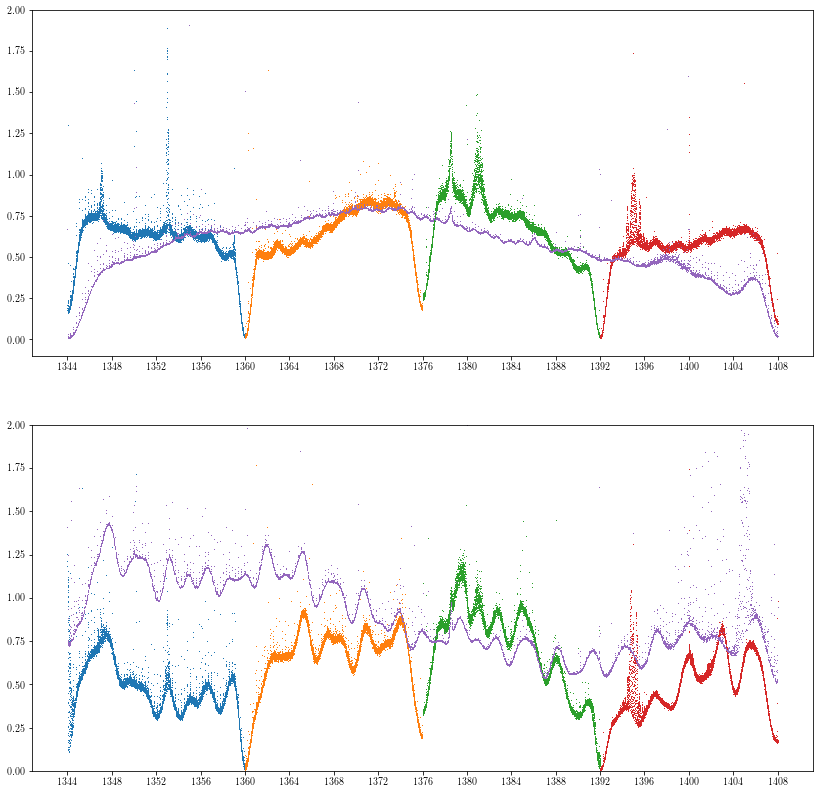

In [476]:
Z = np.array(splitt(get_file('/Users/Lucas/pulsar/hobart.spec'))).astype(float)
z = Z-Z.min(0)
f = z[:,0]

Z2 = np.array(splitt(get_file('/Users/Lucas/pulsar/ho.spec'))).astype(float)
z2 = Z2-Z2.min(0)
f2 = z2[:,0]

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,14))
ax1.plot(1344+f,z[:,1],',',1376-f,z[:,2],',',1344+32+f,z[:,3],',',1376+32-f,z[:,4],',')
ax2.plot(1344+f,z[:,5],',',1376-f,z[:,6],',',1344+32+f,z[:,7],',',1376+32-f,z[:,8],',')

ax1.plot(1344+f2,z2[:,2],',')
ax2.plot(1344+f2,z2[:,1],',')

#ax2.plot(f2,0.1*np.cos(2*f2)+0.5)
for AX in [ax1, ax2]:
    AX.set_ylim([-.1,2])
    AX.set_xticks(np.arange(1344,1408.1,4,))
    
#ax2.set_xlim(40,50)
ax2.set_ylim(0,2)

fig.savefig('/Users/Lucas/Desktop/hobartspectrum.pdf',bbox_inches='tight')

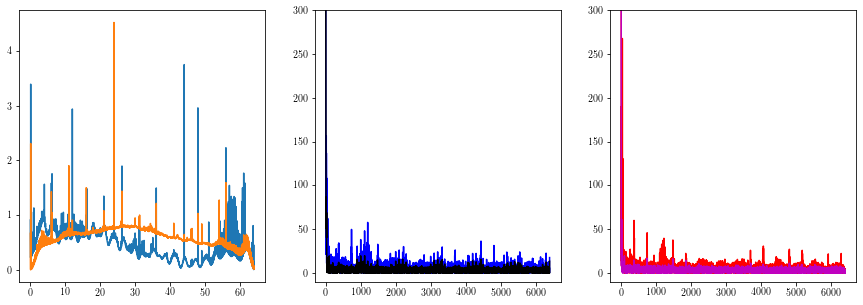

In [518]:
Y  = z2[:,1]
Y2 = z2[:,2]
y = np.fft.rfft(Y)
y2= np.fft.rfft(Y2)
dt = 1/(4*np.diff(f2).mean()*1e6)
d = 2e8*np.arange(0,y.shape[0]-1)*dt/y.shape[0]

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(f2,Y)
ax[0].plot(f2,Y2)
ax[1].plot(d,np.abs(np.real(y ))[1:],'b-')
ax[1].plot(d,np.abs(np.real(y2))[1:],'k-')
ax[2].plot(d,np.abs(np.imag(y ))[1:],'r-')
ax[2].plot(d,np.abs(np.imag(y2))[1:],'m-')
for AX in ax[1:]:
    AX.set_ylim(-10,300)
    #AX.set_xlim(0,100)

In [517]:
2e8/(4*np.diff(f2).mean()*1e6)/y.shape[0]

1.5621186111774217

(-0.5, 3)

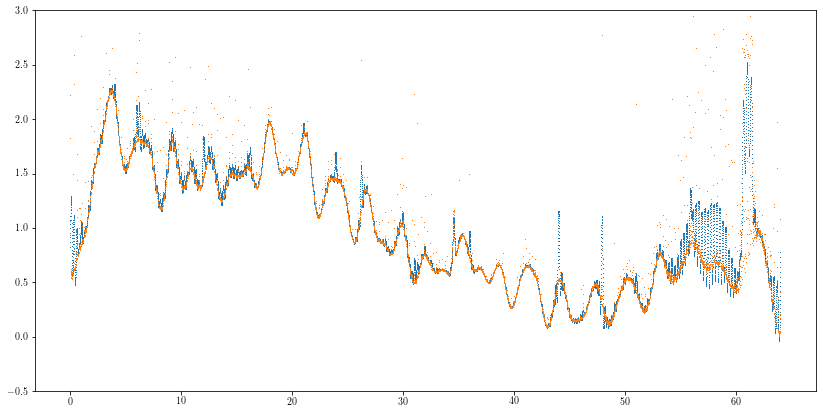

In [486]:
y = np.fft.fft(Y)
y[300:]=0
n=8000
y3 = np.fft.irfft(y[:n+1])
fig, ax = plt.subplots(1,figsize=(14,7))
ax.plot(np.arange(0,64,64/(2*n)),y3/y3.mean(),',')
ax.plot(f2,Y/Y.mean(),',')
ax.set_ylim(-.5,3)

In [181]:
fits1 = splitt(get_file('VELA1_SN4.dat'))
t1    = np.array(replaceDE(refine_fits(fits1,27,'D',2,None))[1::2]).astype(float)
dxx   = np.array(refine_fits(fits1,27,'D',None,10)[1::2]).astype(float)*1e9
dyy   = np.array(refine_fits(fits1,27,'D',None,19)[1::2]).astype(float)*1e9
snrxx = np.array(refine_fits(fits1,27,'D',None,17)[1::2]).astype(float)**2
snryy = np.array(refine_fits(fits1,27,'D',None,26)[1::2]).astype(float)**2

fits2 = splitt(get_file('VELAX_SN4.dat'))
t2    = np.array(replaceDE(refine_fits(fits2,27,'D',2,None))[1::2]).astype(float)
dxy   = np.array(refine_fits(fits2,27,'D',None,10)[1::2]).astype(float)*1e9
dyx   = np.array(refine_fits(fits2,27,'D',None,19)[1::2]).astype(float)*1e9
snrxy = np.array(refine_fits(fits2,27,'D',None,17)[1::2]).astype(float)**2
snryx = np.array(refine_fits(fits2,27,'D',None,26)[1::2]).astype(float)**2


In [300]:
#fits2 = splitt(get_file('VELA2_SN4.dat'))
# t2  = np.array(replaceDE(refine_fits(fits2,27,'D',2,None))[1::2]).astype(float)
#dxx2 = np.array(refine_fits(fits2,27,'D',None,10)[1::2]).astype(float)*1e9
#dyy2 = np.array(refine_fits(fits2,27,'D',None,19)[1::2]).astype(float)*1e9
#snrx2= np.array(refine_fits(fits2,27,'D',None,17)[1::2]).astype(float)
#snry2= np.array(refine_fits(fits2,27,'D',None,26)[1::2]).astype(float)

In [5]:
times = '2021-03-16T00:00:00'
t = Time(times, format='isot', scale='utc')
tcd = Time(t.jd+t1,format='jd',scale='utc',location=('133.8d', '-31.8d')).sidereal_time('apparent').value
tho = Time(t.jd+t1,format='jd',scale='utc',location=('147.8d', '-42.8d')).sidereal_time('apparent').value

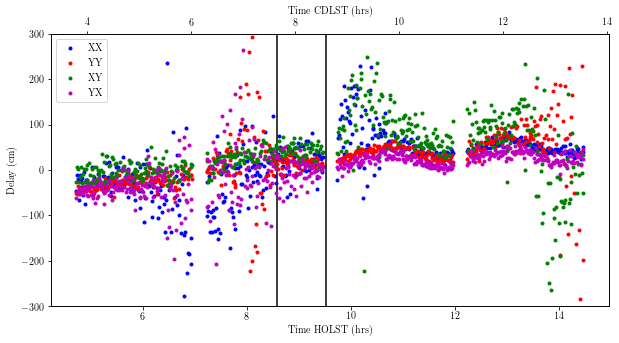

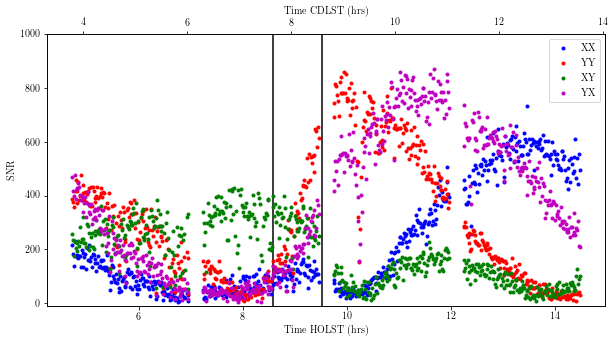

In [187]:
fig1, ax0 = plt.subplots(1,figsize=(10,5))
ax0.plot(tho,dxx*30,'b.')
ax0.plot(tho,dyy*30,'r.')
ax0.plot(tho,dxy*30,'g.')
ax0.plot(tho,dyx*30,'m.')
ax0.legend([R'XX',R'YY',R'XY',R'YX'])
ax0.set_ylabel(R'Delay (cm)')
ax0.set_xlabel('Time HOLST (hrs)')
ax1 = ax0.twiny()
ax1.plot(tcd,dxx,marker=None,lw=0)
ax1.set_xlabel('Time CDLST (hrs)')
ax0.vlines(x=8.588,ymin=-300,ymax=300)
ax1.vlines(x=8.588,ymin=-300,ymax=300)
ax0.set_ylim(-300,300)
#fig1.savefig('/Users/Lucas/pulsar/delayvst.pdf',bbox_inches='tight')

fig2, ax2 = plt.subplots(1,figsize=(10,5))
ax2.plot(tho,snrxx,'b.')
ax2.plot(tho,snryy,'r.')
ax2.plot(tho,snrxy,'g.')
ax2.plot(tho,snryx,'m.')
ax3 = ax2.twiny()
ax3.plot(tcd,dxx,marker=None,lw=0)
ax2.vlines(x=8.588,ymin=-10,ymax=2000)
ax3.vlines(x=8.588,ymin=-10,ymax=2000)
ax2.set_ylim(-10,1000)
ax2.legend([R'XX',R'YY',R'XY',R'YX'])
ax2.set_ylabel(R'SNR')
ax2.set_xlabel('Time HOLST (hrs)')
ax3.set_xlabel('Time CDLST (hrs)')
fig2.savefig('/Users/Lucas/pulsar/SNRvst.pdf',bbox_inches='tight')

In [54]:
def rolling_window(a, window):
    pad = np.ones(len(a.shape), dtype=np.int32)
    pad[-1] = window-1
    pad = list(zip(pad, np.zeros(len(a.shape), dtype=np.int32)))
    a = np.pad(a, pad,mode='reflect')
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


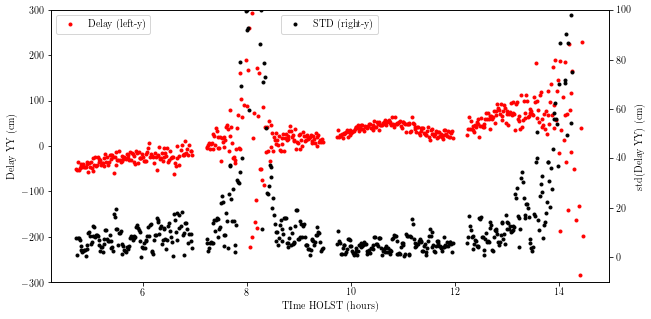

In [58]:
dcm = dyy*30; 

fig, ax1 = plt.subplots(1,figsize=(10,5))
ax1.plot(tho,dcm,'r.')
ax2 = ax1.twinx()
ax2.plot(tho,np.std(rolling_window(dcm,3),axis=1),'k.')
ax1.set_ylim(-300,300)
ax2.set_ylim(-10,100)
ax1.set_ylabel(R'Delay YY (cm)')
ax2.set_ylabel(R'std(Delay YY) (cm)')
ax1.set_xlabel(R'TIme HOLST (hours)')
ax1.legend(['Delay (left-y)'],loc='upper left')
ax2.legend(['STD (right-y)'],loc='upper center')
fig.savefig('/Users/Lucas/pulsar/scatteryy.pdf',bbox_inches='tight')

In [10]:
log = np.array(list(get_file('/Users/Lucas/pulsar/vel21188.log')))

In [152]:
dbbc01 = splitt2(np.array([s for s in log if 'dbbc01' in s and len(s)>=76]),'/')
t = [Time(datetime.datetime.strptime(s,'%Y.%j.%H:%M:%S.%f')).mjd for s in dbbc01[:,0]]
T1 = np.array(t - t[0].round(0))*24.
l1 = splitt2(dbbc01[:,3],',')[:,7].astype(float)

dbbc09 = splitt2(np.array([s for s in log if 'dbbc09' in s and len(s)>=76]),'/')
t = [Time(datetime.datetime.strptime(s,'%Y.%j.%H:%M:%S.%f')).mjd for s in dbbc09[:,0]]
T2 = np.array(t - t[0].round(0))*24.0
l2 = splitt2(dbbc09[:,3],',')[:,7].astype(float)

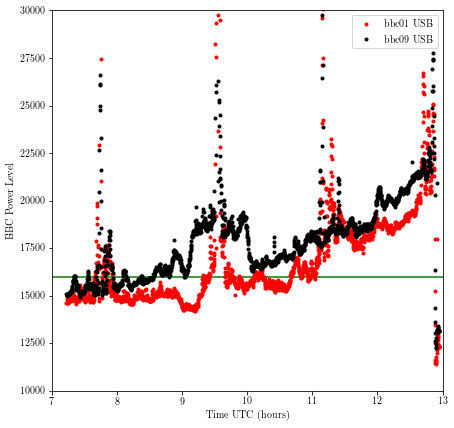

In [169]:
fig, ax = plt.subplots(1,figsize=(7,7))
ax.plot(T1,l1,'r.')
ax.plot(T2,l2,'k.')
ax.set_ylim(10000,30000)
ax.hlines(xmin=6,xmax=14,y=16000,color='g')
ax.set_xlim(7,13)
ax.set_xlabel(R'Time UTC (hours)')
ax.set_ylabel(R'BBC Power Level')
ax.legend([R'bbc01 USB',R'bbc09 USB'])
fig.savefig('/Users/Lucas/Desktop/bbc_power.pdf',bbox_inches='tight')

In [154]:
dbbcifa = splitt2(np.array([s for s in log if 'dbbcifa' in s and len(s)>=58]),'/')
t = [Time(datetime.datetime.strptime(s,'%Y.%j.%H:%M:%S.%f')).mjd for s in dbbcifa[:,0]]
T3 = np.array(t - t[0].round(0))*24.
L1 = splitt2(dbbcifa[:,3],',')[:,-3].astype(float)

dbbcifb = splitt2(np.array([s for s in log if 'dbbcifb' in s and len(s)>=58]),'/')
t = [Time(datetime.datetime.strptime(s,'%Y.%j.%H:%M:%S.%f')).mjd for s in dbbcifb[:,0]]
T4 = np.array(t - t[0].round(0))*24.
L2 = splitt2(dbbcifb[:,3],',')[:,-3].astype(float)

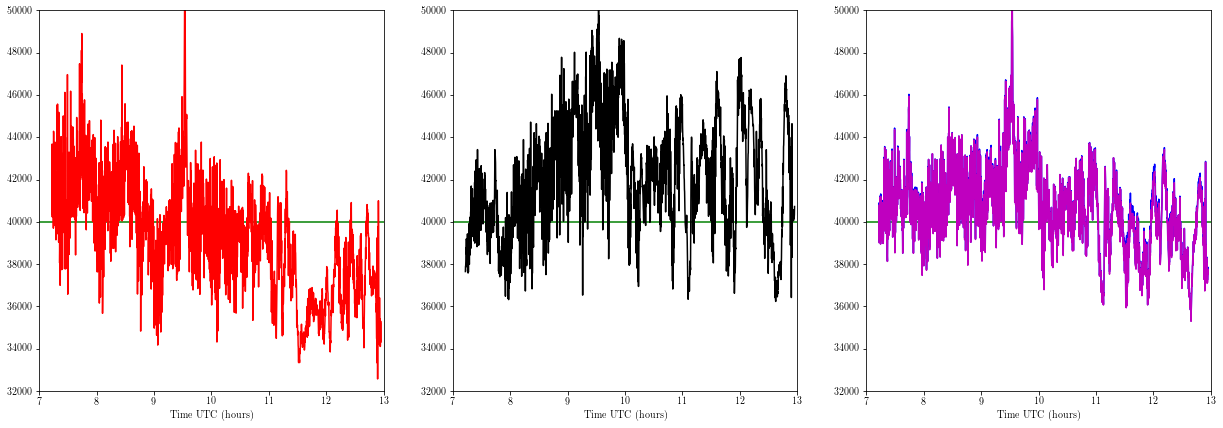

In [529]:
fig, ax = plt.subplots(1,3,figsize=(21,7))
ax[0].plot(T3,L1,'r-')
ax[1].plot(T4,L2,'k-')
for AX in ax:
    AX.hlines(xmin=6,xmax=14,y=40000,color='g')
    AX.set_xlim(7,13)
    AX.set_ylim(32000,50000)
    AX.set_xlabel(R'Time UTC (hours)')
    #AX.legend([R'IFA',R'IFB'])

ax[2].plot(T3,1./2**0.5*(L1**2+L2**2)**0.5,'b')
ax[2].plot(T3,1./2*(L1+L2),'m')    


In [153]:
fits3 = splitt(get_file('VELAX_SN6.dat'))
t3    = np.array(replaceDE(refine_fits(fits3,27,'D',2,None))[1::2]).astype(float)
dxy3  = replaceINDEv(np.array(refine_fits(fits3,27,'E',10,None)[1::2])).astype(float)*1e9
dyx3  = replaceINDEv(np.array(refine_fits(fits3,27,'E',19,None)[1::2])).astype(float)*1e9

times = '2021-03-16T00:00:00'
t = Time(times, format='isot', scale='utc')
tcd3 = Time(t.jd+t3,format='jd',scale='utc',location=('133.8d', '-31.8d')).sidereal_time('apparent').value
tho3 = Time(t.jd+t3,format='jd',scale='utc',location=('147.8d', '-42.8d')).sidereal_time('apparent').value

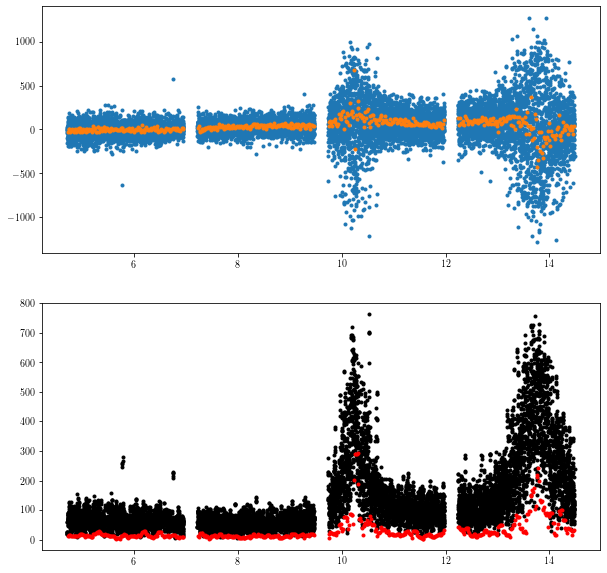

In [174]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(tho3,30*dxy3,'.')
ax[0].plot(tho,30*dxy,'.')

ax[1].plot(tho3,np.std(rolling_window(30*dxy3,5),axis=1),'k.')
ax[1].plot(tho,np.std(rolling_window(30*dxy,5),axis=1),'r.')

In [179]:
np.nanmedian(np.std(rolling_window(30*dxy3,5),axis=1))*np.sqrt(2.047)

125.6757635605108

In [180]:
np.nanmedian(np.std(rolling_window(30*dxy,5),axis=1))*np.sqrt(60)

133.75912536038535